# 02 Machine Learning / Proyecto

## Credit Card Leads

### Equipo:
- Javier De La Rosa Mondragon
- Luis Fernando Merino Nambo
- Salomon Ramírez

![Leads](credit-cards.jpg)

##  Dataset

Credit Card Lead Prediction

https://www.kaggle.com/datasets/shelvigarg/credit-card-buyers

- ~250,000 filas en train set

- ~100,000 etiquetas en test set

- 10 Features
    - ID
    - Sexo
    - Edad
    - Region
    - Ocupación
    - Channel code
    - Vintage
    - Credit product
    - Balance promedio
    - Activo
    


- 1 Columna de target
    - Lead

## Objetivo

Analizar, limpiar y usar el train dataset para identificar clientes con tendencia a adquirur una tarjeta de crédito tomando como features los datos del cliente y los productos con los que ya cuentan.


## Importación de bibliotecas 

In [1]:
# VARIABLES DE EJECUCIÓN
FINAL = False

In [76]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from matplotlib import pyplot as plt
# definimos la paleta default para seaborn
#pal = sns.color_palette("Paired_r")
palPaired = sns.color_palette("Accent")
#palQualitative = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
palQualitative = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
sns.set()
sns.set_palette( palQualitative )



## Lectura de datos

In [3]:
creditCardLeadDataFrame = pd.read_csv('./data/train data credit card.csv')

if not FINAL:
    creditCardLeadDataFrame = creditCardLeadDataFrame.sample(frac=.05, random_state=23)

data = creditCardLeadDataFrame.copy()

In [4]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
32512,HOBEMW8D,Female,37,RG269,Salaried,X3,93,Yes,718149,No,1
136217,BWTSERSZ,Female,32,RG252,Salaried,X1,32,No,226184,No,0
188783,N3HMTCMZ,Male,45,RG282,Self_Employed,X1,37,No,856714,No,1
241070,3WUQE2QU,Female,40,RG268,Self_Employed,X2,62,Yes,1410249,No,1
88574,HKFWMCDH,Female,61,RG277,Self_Employed,X3,44,NaN,984242,Yes,1


## Limpieza y EDA

In [5]:
display(data.isna().sum())
print(data.shape)

ID                        0
Gender                    0
Age                       0
Region_Code               0
Occupation                0
Channel_Code              0
Vintage                   0
Credit_Product         1466
Avg_Account_Balance       0
Is_Active                 0
Is_Lead                   0
dtype: int64

(12286, 11)


In [6]:
# ya que el trainset es muy grande, empezaremos eliminando las filas con datos vaciós
data = data.dropna()
display(data.isna().sum().sum())
print(data.shape)

0

(10820, 11)


In [7]:
# hagamos una copia del dataset "original" (luego de a limpieza de datos):
dataOriginal = data.copy()

In [8]:
def create_piechart_with_values(data, title, ax, optional_names=None):
    df = data
    value_counts = df.value_counts()
    category_counts = df.value_counts().values
    patches, texts, autotexts = ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

    total = sum(value_counts.values)
    label_values = []
    if optional_names:
        value_counts.index = optional_names
        
    for n,v in zip(value_counts.index,value_counts.values):
        v = f'{v:,}'
        #label_values.append(    f'{n}: {v} ({(v / total) * 100:.1f}%)'    )
        label_values.append(    f'{n}: {v}'    )
    
    for i, text in enumerate(texts):
        text.set_text(label_values[i])
    
    ax.set_title(title)

### Variables Categóricas

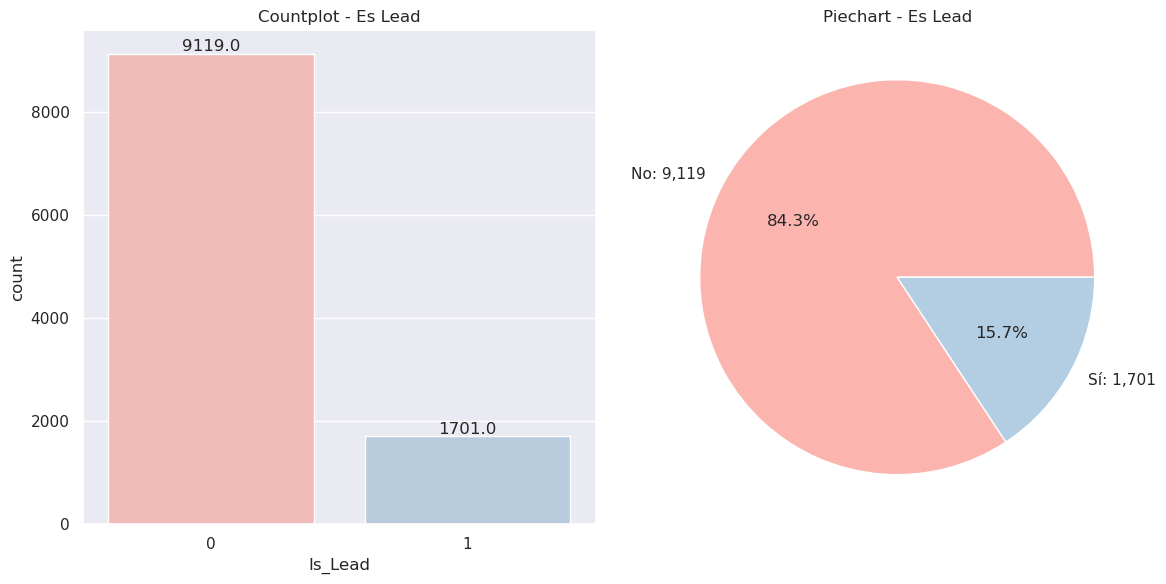

In [9]:
# ya que trabajaremos con clasificación, veamos cuántos casos hay de cada categoría:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=data.Is_Lead, ax=ax1)
ax1.set_title('Countplot - Es Lead')

for p in ax1.patches:
    ax1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

create_piechart_with_values(data.Is_Lead, 'Piechart - Es Lead',ax2,['No','Sí'])    

plt.tight_layout()
plt.show()


In [10]:
# Observamos que hay una deproporción muy grande.

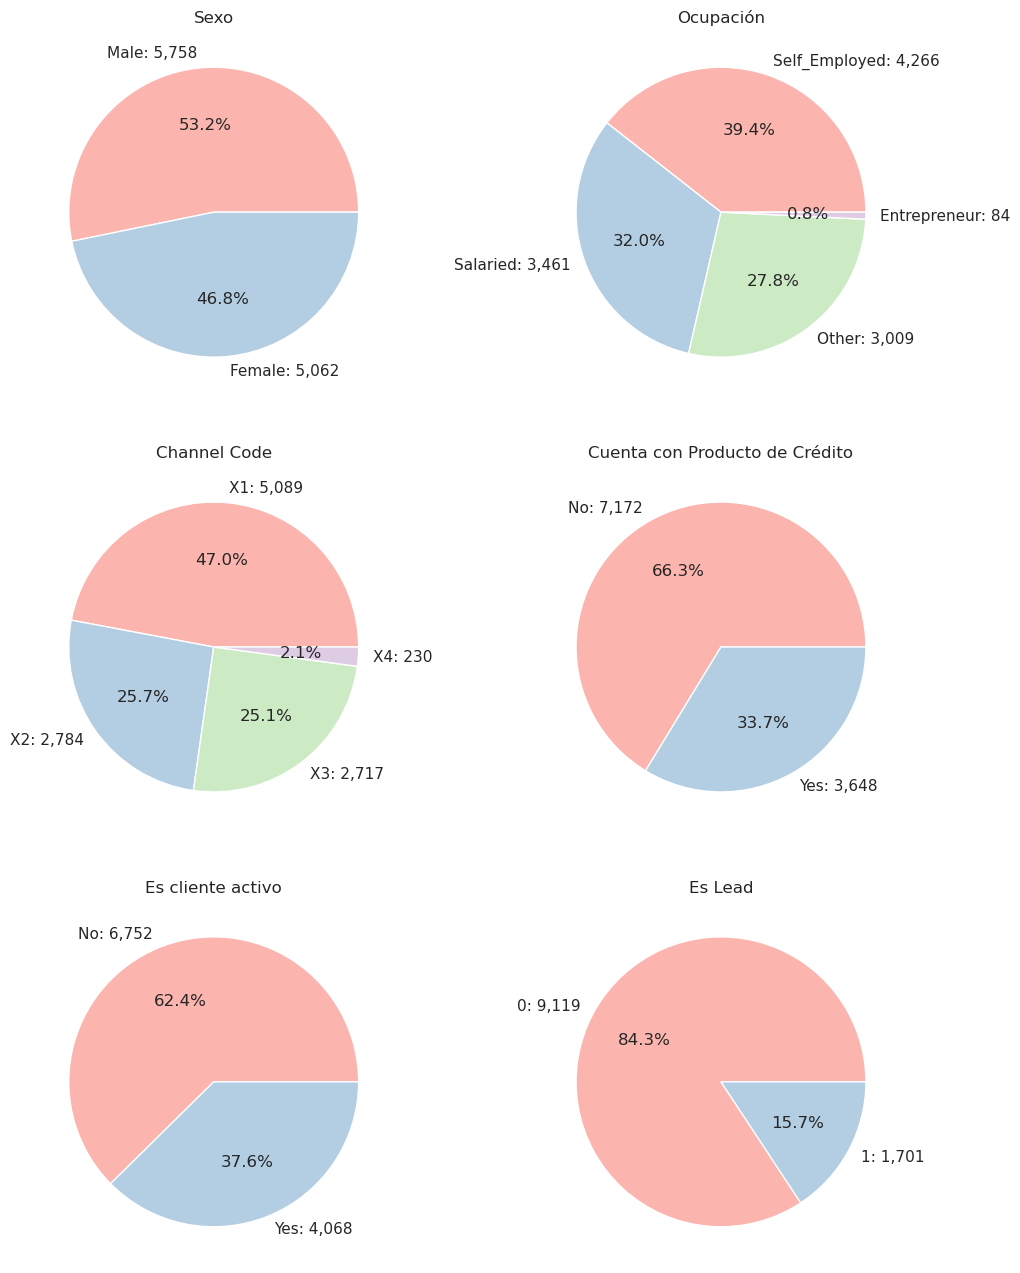

In [11]:
# Veamos las distribuciones de algunas variables:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

#sns.countplot(data=creditCardLeadDf, x='Gender', ax=axes[0])
#axes[0].set_title('Sexo')
#sns.countplot(data=creditCardLeadDf, x='Is_Active', ax=axes[0])
#axes[0].set_title('Es cliente activo')
#sns.countplot(data=creditCardLeadDf, x='Credit_Product', ax=axes[1])
#axes[1].set_title('Cuenta con Producto de Crédito')
#sns.countplot(data=creditCardLeadDf, x='Occupation', ax=axes[1])
#axes[1].set_title('Ocupación')

create_piechart_with_values(data.Gender, 'Sexo',axes[0][0])
create_piechart_with_values(data.Occupation, 'Ocupación',axes[0][1])
create_piechart_with_values(data.Channel_Code, 'Channel Code',axes[1][0])
create_piechart_with_values(data.Credit_Product, 'Cuenta con Producto de Crédito',axes[1][1])
create_piechart_with_values(data.Is_Active, 'Es cliente activo',axes[2][0])
create_piechart_with_values(data.Is_Lead, 'Es Lead',axes[2][1])

#plt.tight_layout()
plt.show()

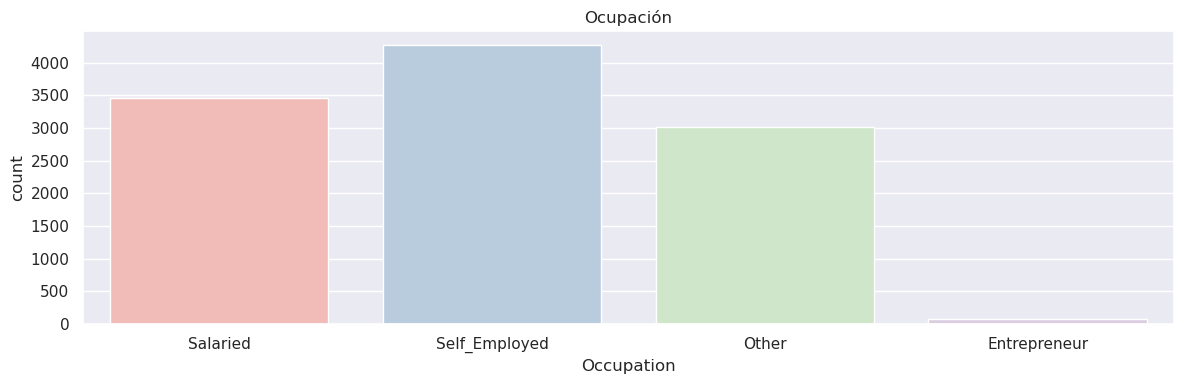

In [12]:
# Veamos las distribuciones de algunas variables:
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
sns.countplot(data=data, x='Occupation', ax=axes)
axes.set_title('Ocupación')
plt.tight_layout()

# Show the plot
plt.show()

Hay 35 valores distintos de Region_Code


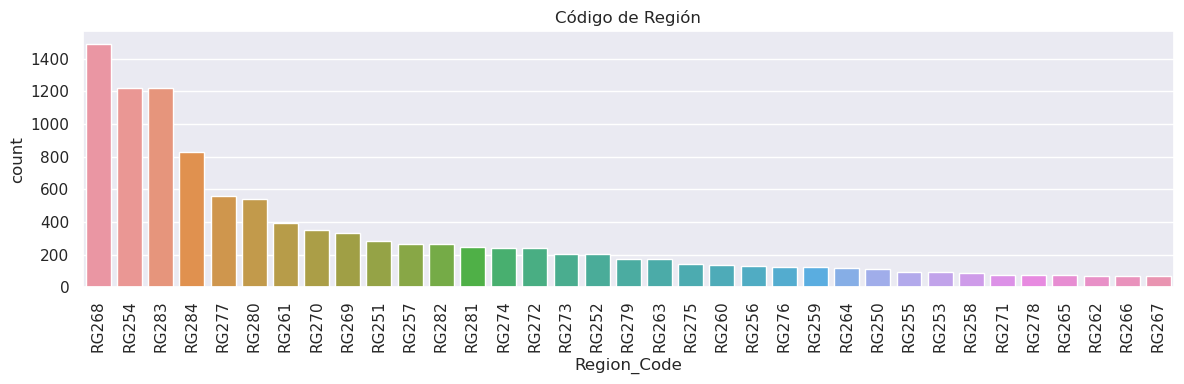

In [13]:
# Veamos las proporciones en algunas variables:
print('Hay',data.Region_Code.value_counts().shape[0],'valores distintos de Region_Code')

fig, axes = plt.subplots(1, 1, figsize=(12, 4))
sns.countplot(data=data.sort_values(by='Region_Code'), x='Region_Code', ax=axes, order = data['Region_Code'].value_counts().index)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_title('Código de Región')
plt.tight_layout()

# Show the plot
plt.show()

Veremos más adelante si esta variable es relevante para la clasificación


### Variables Numéricas

Veamos histogramas y boxplots para las dos variables numéricas que tienen nuestros datos

In [14]:
def createHist(data,titulo,nobins=None):
    fig, axes = plt.subplots(2, 1, figsize=(12, 4))
    #data = creditCardLeadDf['Avg_Account_Balance']
    #titulo = 'Balance Promedio'

    if nobins:
        sns.histplot(data,ax=axes[0],bins= (data.max()-data.min()) )
    else:
        sns.histplot(data,ax=axes[0] )
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(titulo+' - Histograma')

    sns.boxplot(x=data, ax=axes[1])
    mean_value = np.mean(data)
    axes[1].plot(mean_value, 0,  marker='o', color='red', label='Mean')
    axes[1].text(mean_value+mean_value/1.5, -.3, f"Mean: {mean_value:.2f}", color='teal', ha='left', va='center')
    #axes[1].set_xlabel('Values')
    #axes[1].set_ylabel('Count')
    axes[1].set_title(titulo+' - Boxplot')
    #axes[1].legend()


    plt.tight_layout()
    plt.show()


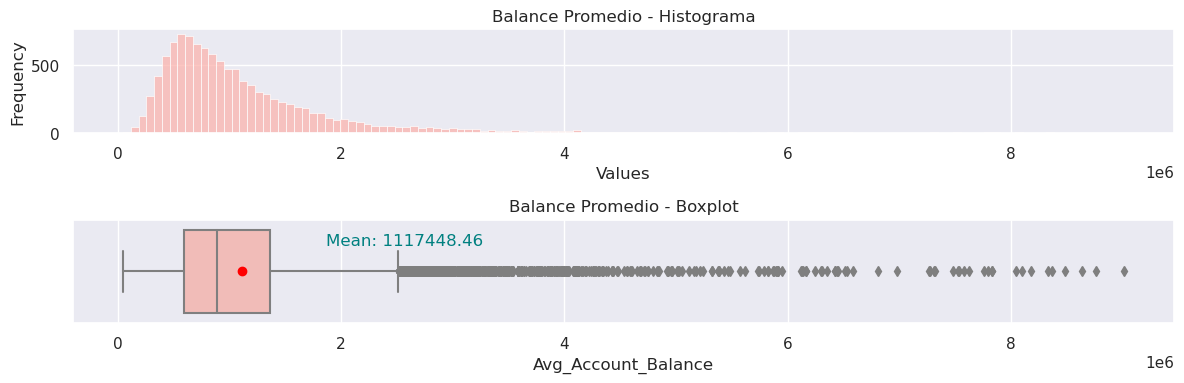

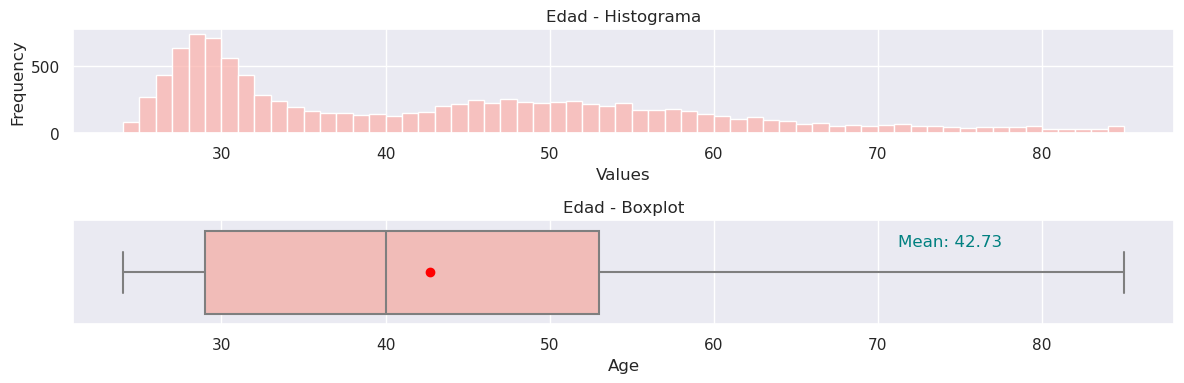

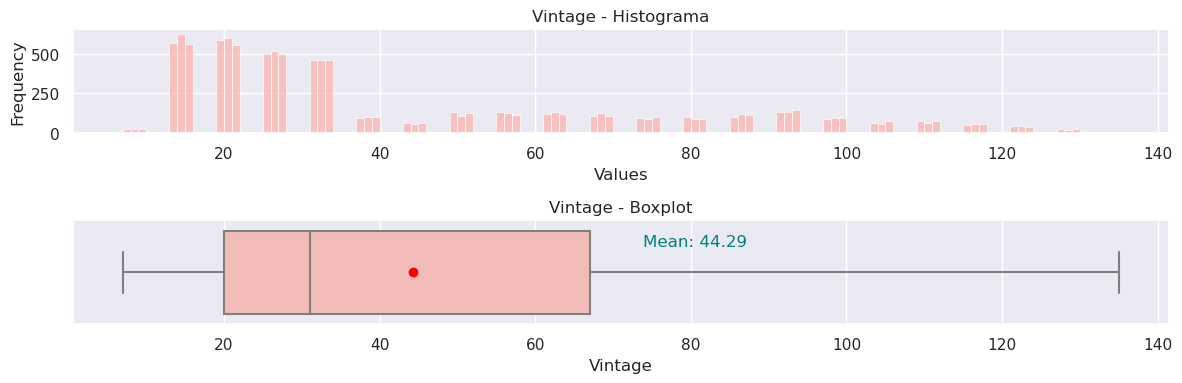

In [15]:
#sns.set_palette( palQualitative )
createHist(data['Avg_Account_Balance'],'Balance Promedio')
createHist(data['Age'],'Edad',nobins=True)
createHist(data['Vintage'],'Vintage',nobins=True)

In [16]:
# ya que la columna ID no aporta nada a la clasificación, la eliminaremos
data = data.drop('ID', axis=1)

In [17]:
data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
32512,Female,37,RG269,Salaried,X3,93,Yes,718149,No,1
136217,Female,32,RG252,Salaried,X1,32,No,226184,No,0
188783,Male,45,RG282,Self_Employed,X1,37,No,856714,No,1
241070,Female,40,RG268,Self_Employed,X2,62,Yes,1410249,No,1
113147,Male,40,RG279,Self_Employed,X2,13,No,449752,No,0


### Conversión de variables a one-hot encoding

In [18]:
# las siguientes columnas puedes ser codificadas como one-hot:
# Gender (2 valores), Region_Code (35), Occupation (4), Channel_Code (4), Credit_Product (2), Is_Active (2)

In [19]:
# Codificamos en one-hot:
toOneHot = ['Gender', 'Occupation', 'Is_Active', 'Credit_Product','Channel_Code', 'Region_Code']
data = pd.get_dummies(data,columns=toOneHot)
print(data.shape)
display(data)

(10820, 53)


,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
32512,37,93,718149,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
136217,32,32,226184,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
188783,45,37,856714,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
241070,40,62,1410249,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
113147,40,13,449752,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103343,74,32,331622,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
206354,47,93,627343,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
113215,43,55,347731,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
37799,28,13,663966,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dataOriginal.Credit_Product

32512     Yes
136217     No
188783     No
241070    Yes
113147     No
         ... 
103343     No
206354     No
113215     No
37799     Yes
161988     No
Name: Credit_Product, Length: 10820, dtype: object

In [21]:
# Para las variables que originalmente eran binarias, podemos eliminar una de sus
# dos columnas provenientes de get_dummies (Gender, Is_Active, ):
data = data.drop(['Gender_Female','Is_Active_No','Credit_Product_No'], axis=1)
data.shape

(10820, 50)

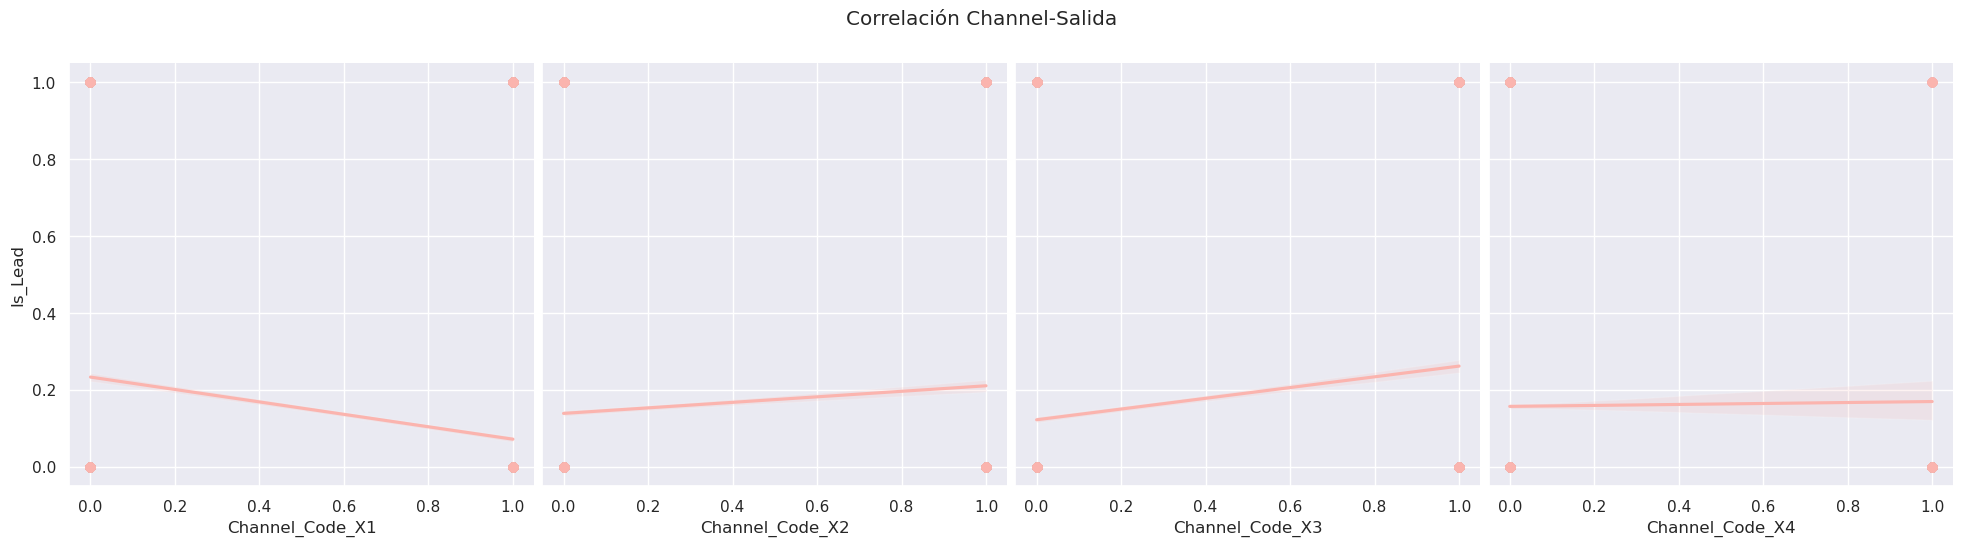

In [22]:
# Tratemos de ver correlación entre las variables de Channel_Code y la salida
x_vars = [ x for x in list(data) if 'Channel_Code' in x] 
graphsPerRow = len(x_vars)
assert len(x_vars) % graphsPerRow == 0,f'usa un múltiplo de {len(x_vars)} para el número de gráficas por fila'
for i in range(int(len(x_vars)/graphsPerRow)):
    graph = sns.pairplot(data, x_vars=x_vars[i*graphsPerRow:i*graphsPerRow+graphsPerRow], y_vars='Is_Lead', height=5, aspect=1, kind='reg')
    graph.fig.suptitle('Correlación Channel-Salida', y=1.08)
    plt.show()

# Observaciones:    
# Parece que por lo menos las tres primeras sí tienen un efecto en la salida
# Aquí podría parecer que el chanel X4 es el menos efectivo obteniendo leads

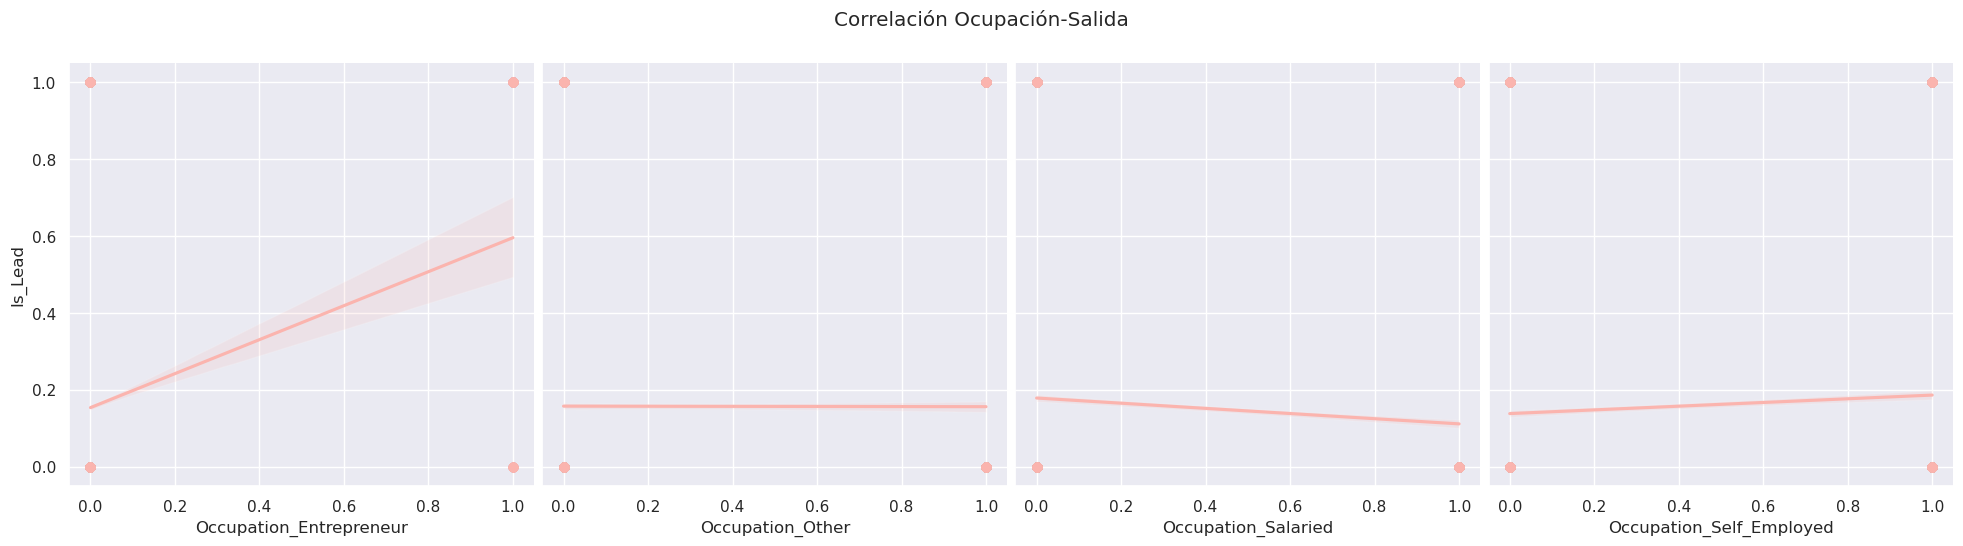

In [23]:
# Tratemos de ver correlación entre las variables de Occupation y la salida
x_vars = [ x for x in list(data) if 'Occupation' in x] 
graphsPerRow = len(x_vars)
assert len(x_vars) % graphsPerRow == 0,f'usa un múltiplo de {len(x_vars)} para el número de gráficas por fila'
for i in range(int(len(x_vars)/graphsPerRow)):
    graph = sns.pairplot(data, x_vars=x_vars[i*graphsPerRow:i*graphsPerRow+graphsPerRow], y_vars='Is_Lead', height=5, aspect=1, kind='reg')
    graph.fig.suptitle('Correlación Ocupación-Salida', y=1.08)
    plt.show()

# Observaciones:    
# Vemos que de entre las 4, Occupation_Entrepreneur es la que tiene más efecto sobre la salida

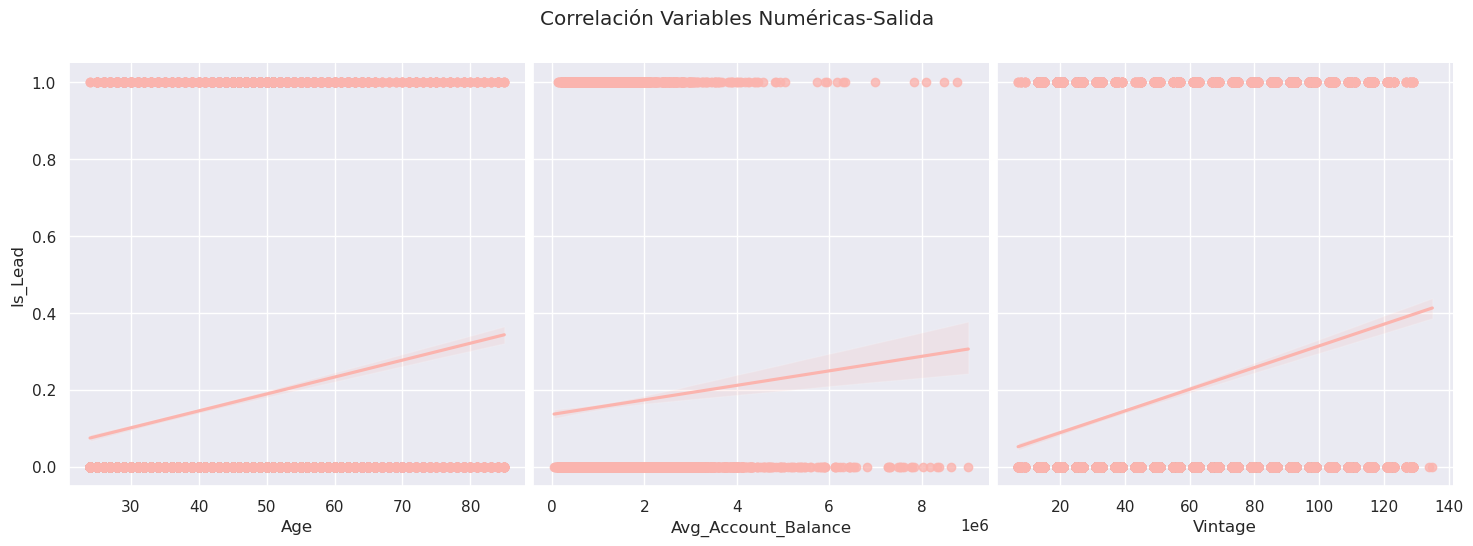

In [24]:
# Tratemos de ver correlación entre nuestras variables numéricas y la salida:
x_vars = ['Age','Avg_Account_Balance','Vintage'] 
graphsPerRow = len(x_vars)
assert len(x_vars) % graphsPerRow == 0,f'usa un múltiplo de {len(x_vars)} para el número de gráficas por fila'
for i in range(int(len(x_vars)/graphsPerRow)):
    graph = sns.pairplot(data, x_vars=x_vars[i*graphsPerRow:i*graphsPerRow+graphsPerRow], y_vars='Is_Lead', height=5, aspect=1, kind='reg')
    graph.fig.suptitle('Correlación Variables Numéricas-Salida', y=1.08)
    plt.show()
    
# Observaciones:
# Vemos que de las tres tienen cierto grado apreciable de correlación con la salida

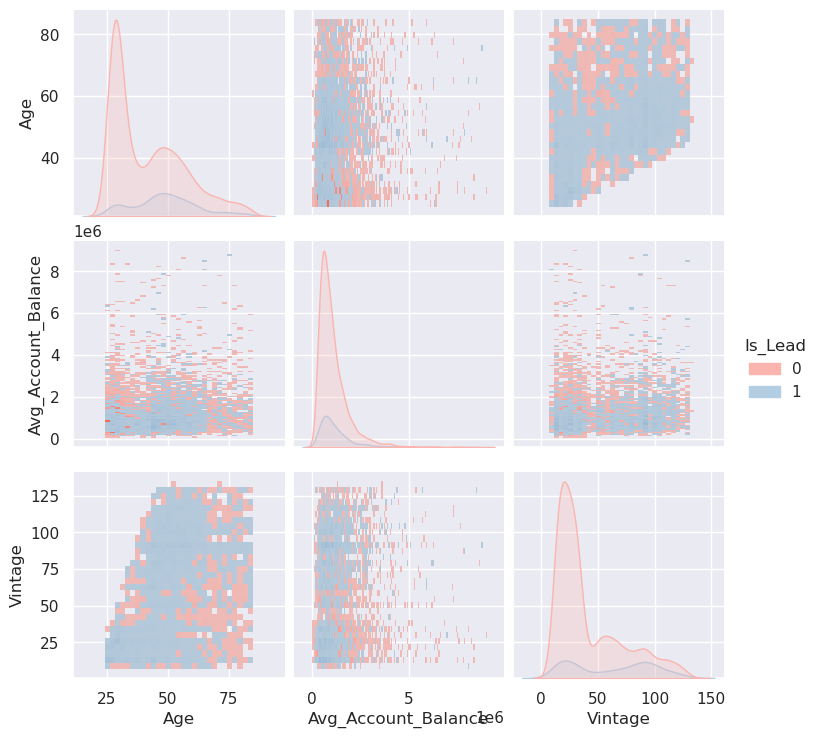

In [25]:
# Y ahora veamos la correclación entre esas tres variables
#sns.pairplot(data, vars=x_vars, hue='Is_Lead', markers = ['d','v'], kind = "hist", diag_kind = None)
sns.pairplot(data, vars=x_vars, hue='Is_Lead', kind = "hist", diag_kind = 'kde')

# Observaciones:
# No encotramos mucha correlación entre éstas

In [26]:
# También vemos la correlación entre estas variables usando Spearman
display(data[x_vars].corr(method="spearman"))

# Observaciones:
# Se observa una correlación significativa entre Age y Vintage, lo cual es de esperarse porque
# sólo la gente de mayor edad puede tener más historial crediticio
# (Yo esperaba encontrar más correlación entre edad y balance)

,Age,Avg_Account_Balance,Vintage
Age,1.000000,0.164231,0.654786
Avg_Account_Balance,0.164231,1.000000,0.183715
Vintage,0.654786,0.183715,1.000000


['Region_Code_RG250', 'Region_Code_RG251', 'Region_Code_RG252', 'Region_Code_RG253', 'Region_Code_RG254', 'Region_Code_RG255', 'Region_Code_RG256', 'Region_Code_RG257', 'Region_Code_RG258', 'Region_Code_RG259', 'Region_Code_RG260', 'Region_Code_RG261', 'Region_Code_RG262', 'Region_Code_RG263', 'Region_Code_RG264', 'Region_Code_RG265', 'Region_Code_RG266', 'Region_Code_RG267', 'Region_Code_RG268', 'Region_Code_RG269', 'Region_Code_RG270', 'Region_Code_RG271', 'Region_Code_RG272', 'Region_Code_RG273', 'Region_Code_RG274', 'Region_Code_RG275', 'Region_Code_RG276', 'Region_Code_RG277', 'Region_Code_RG278', 'Region_Code_RG279', 'Region_Code_RG280', 'Region_Code_RG281', 'Region_Code_RG282', 'Region_Code_RG283', 'Region_Code_RG284']
35


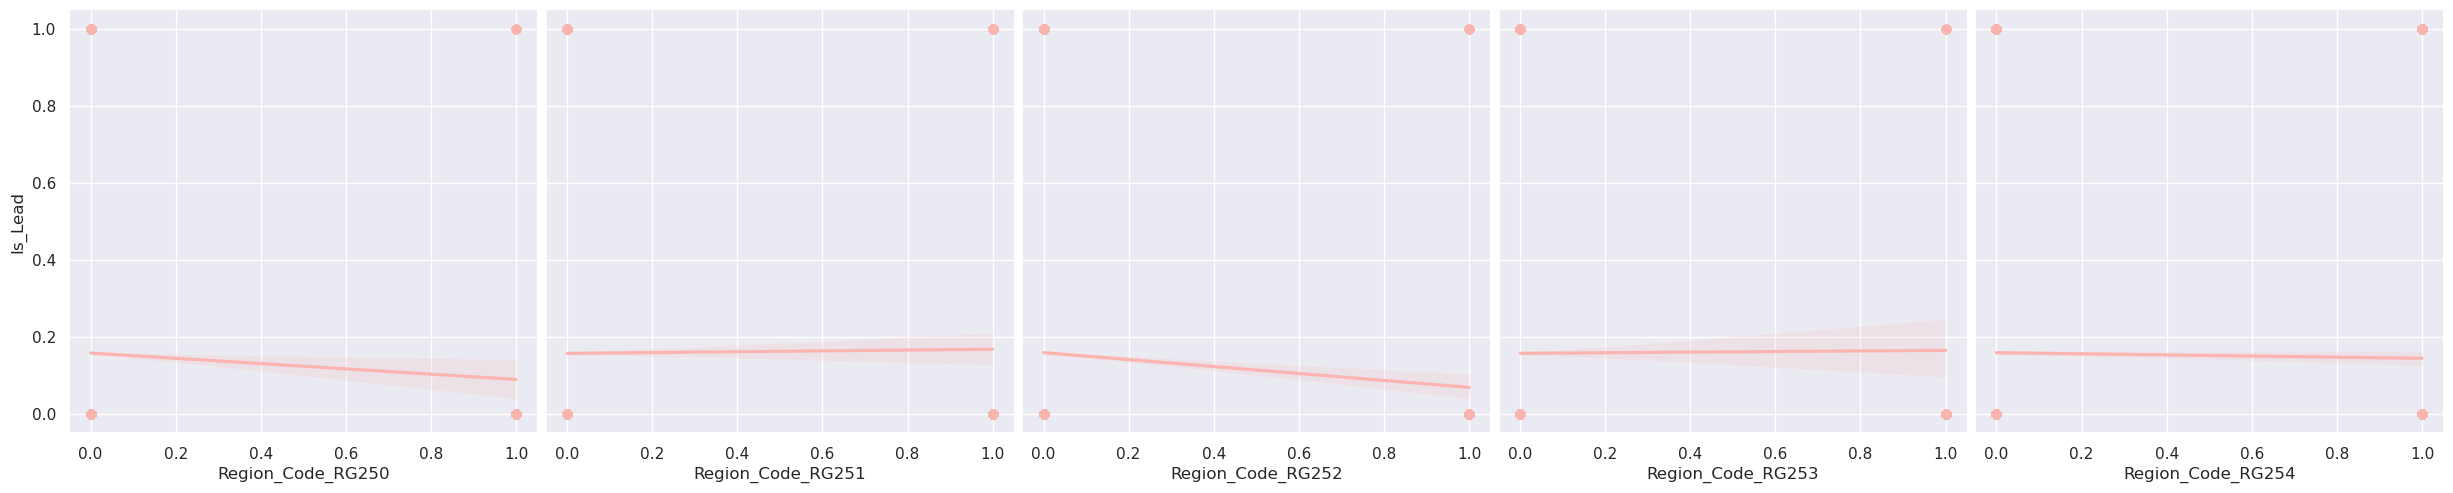

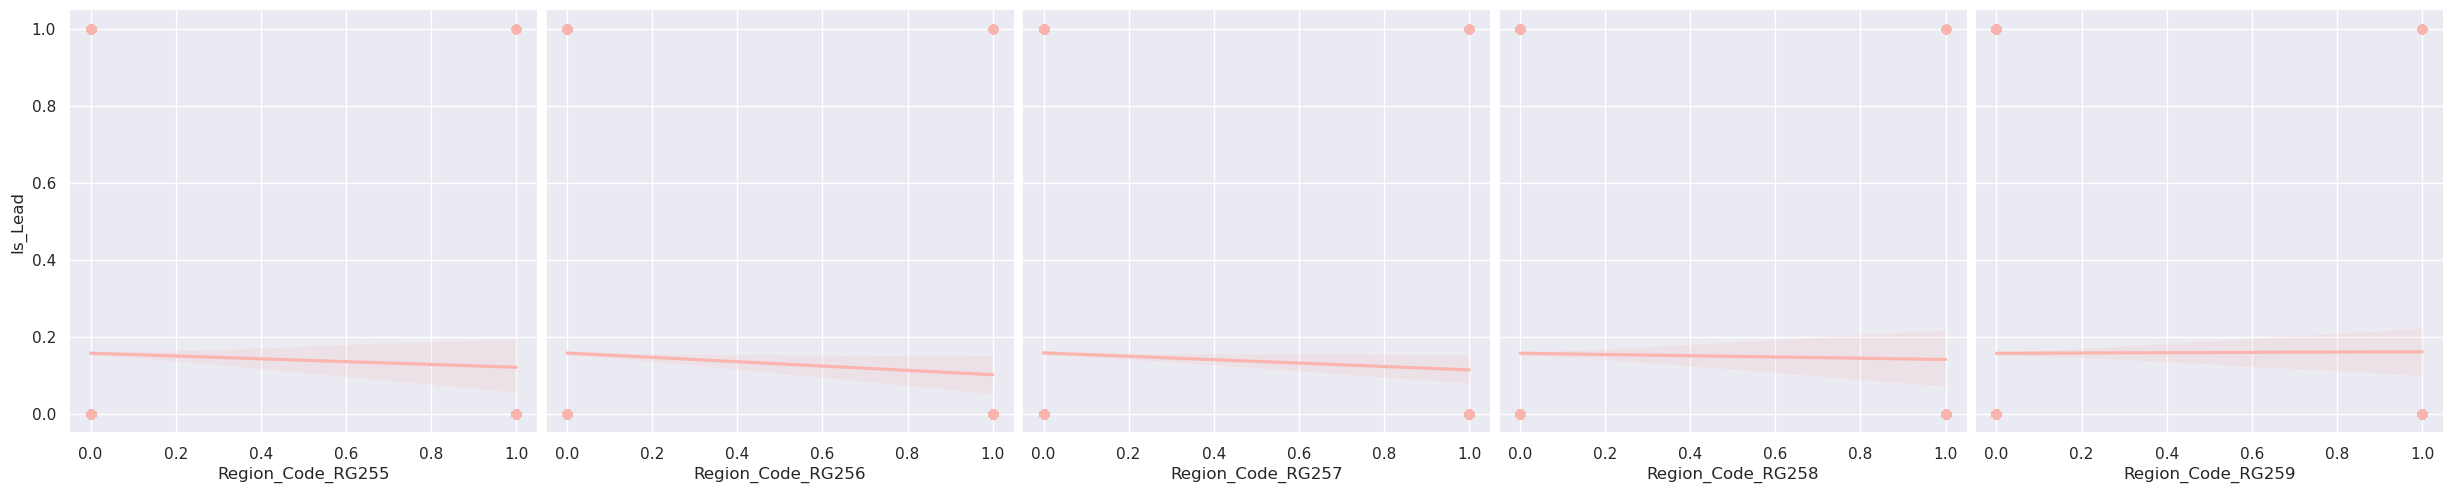

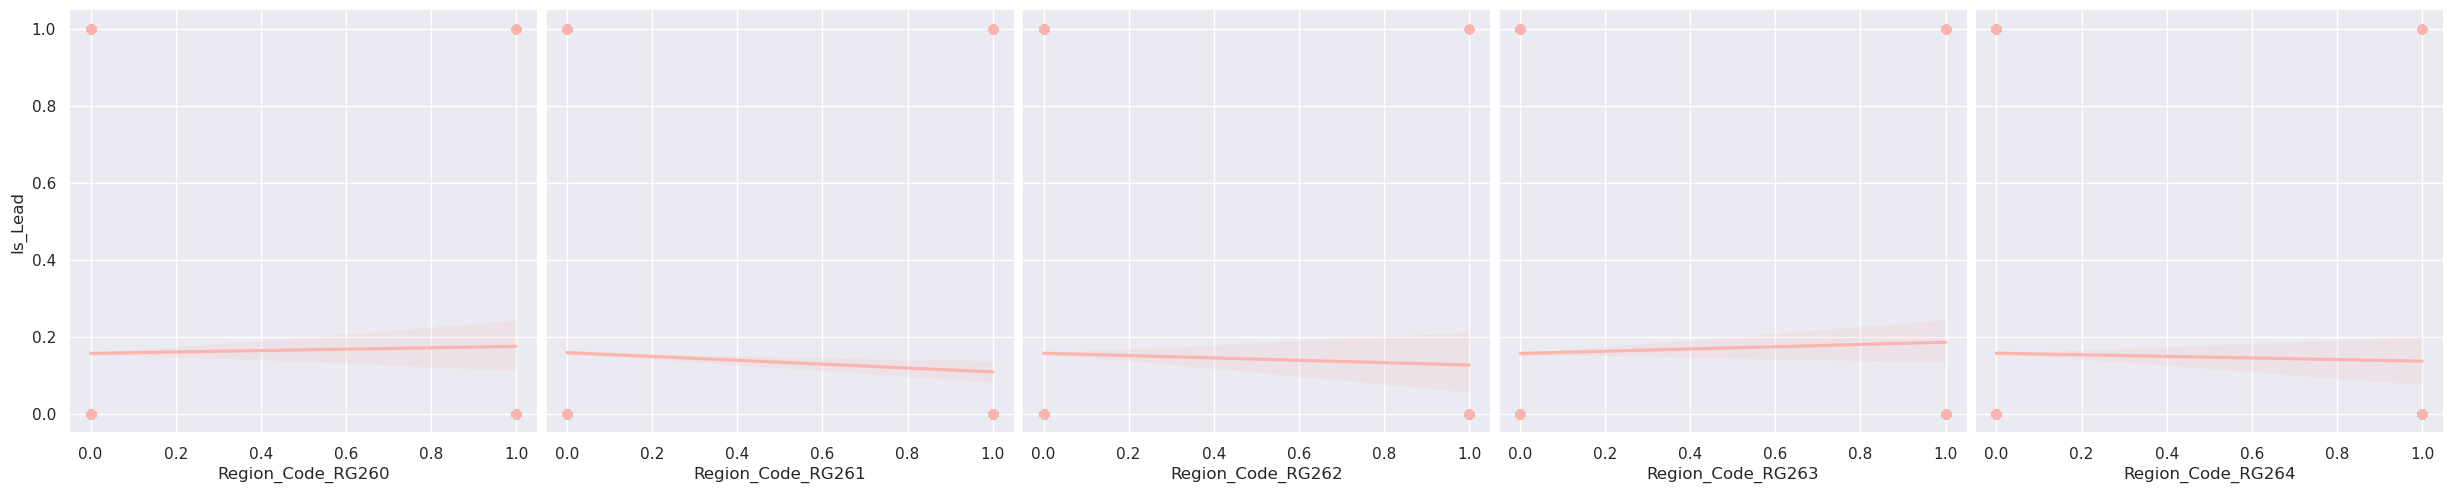

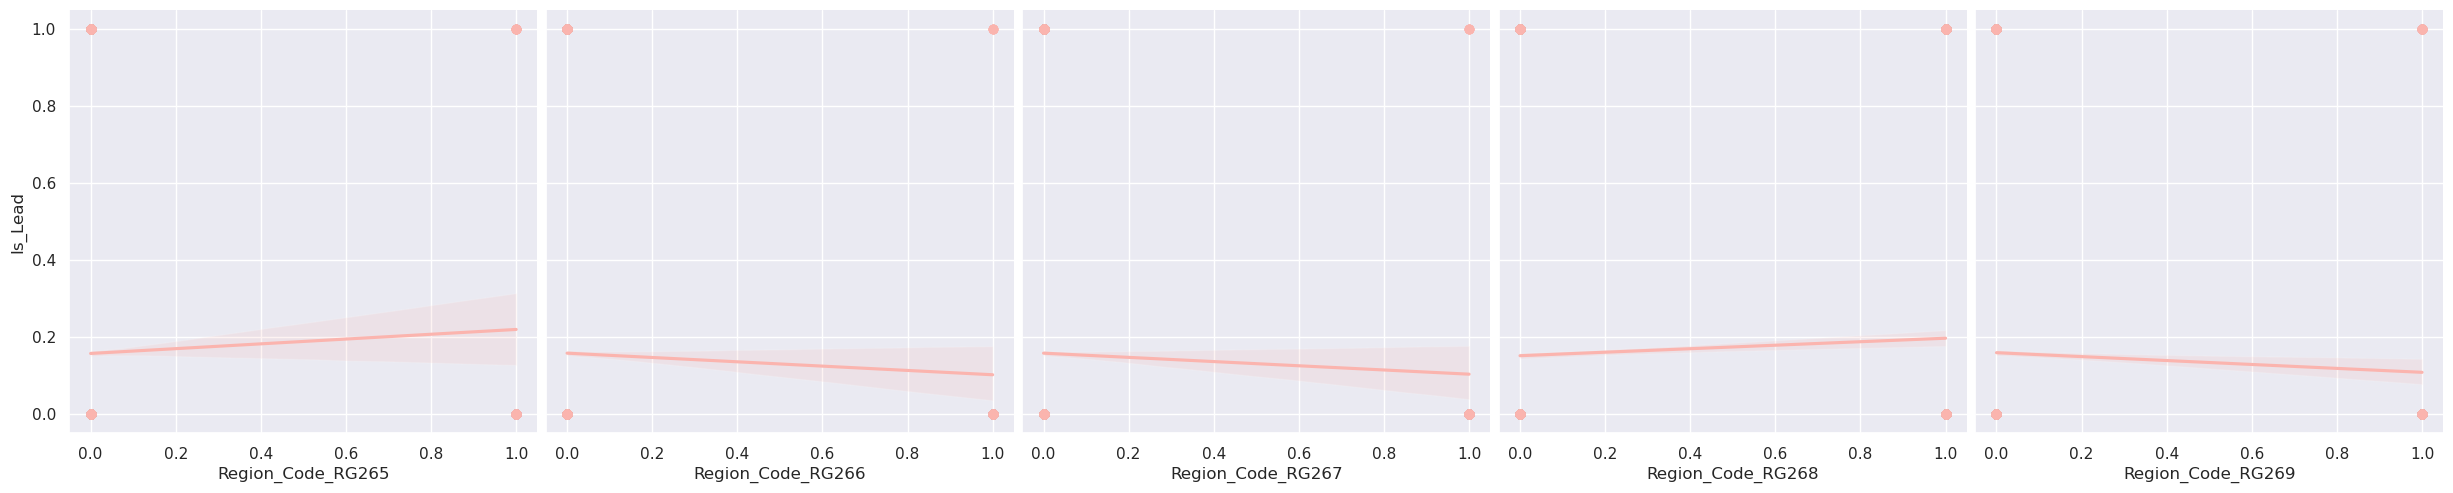

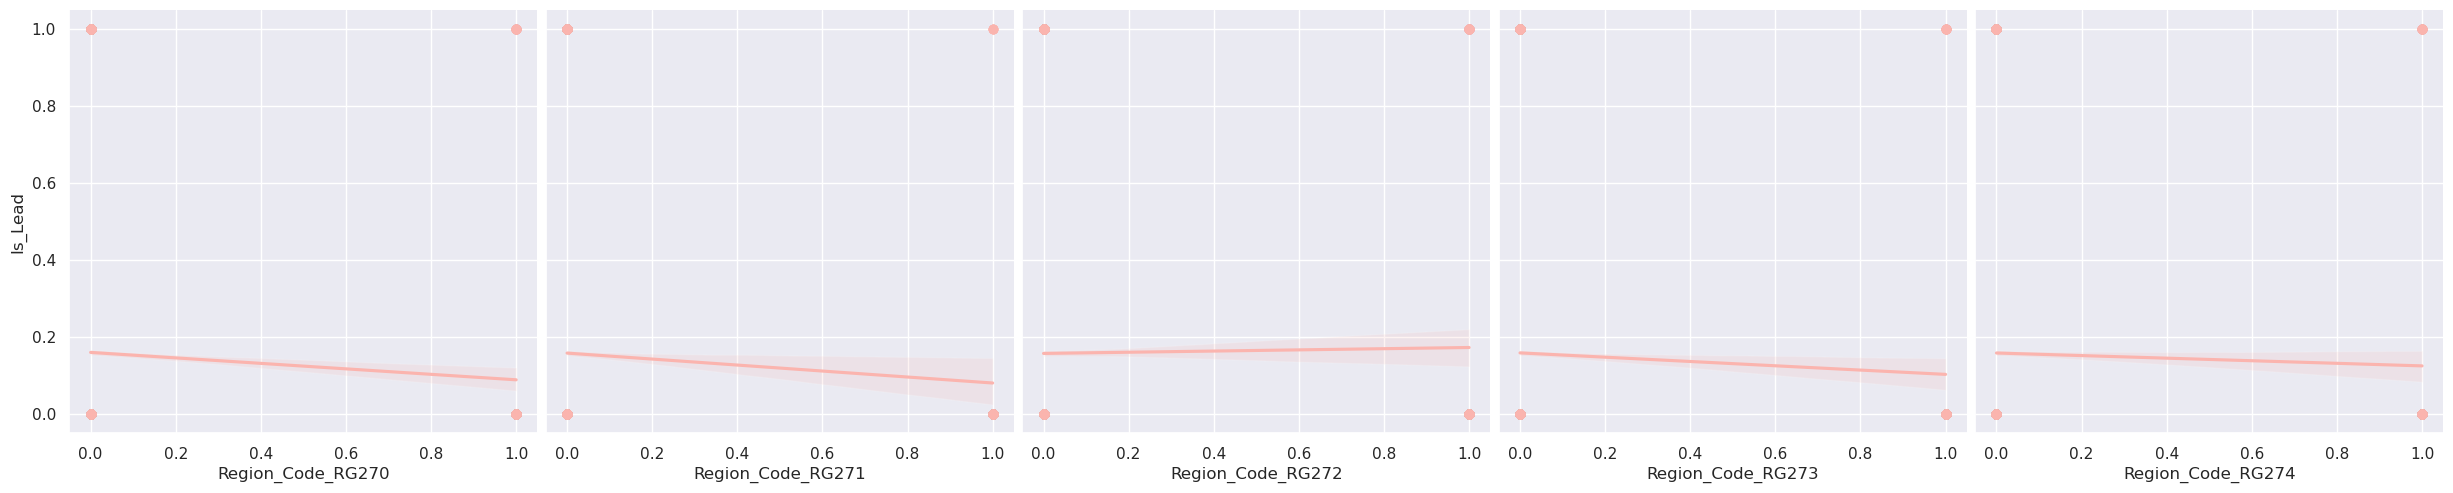

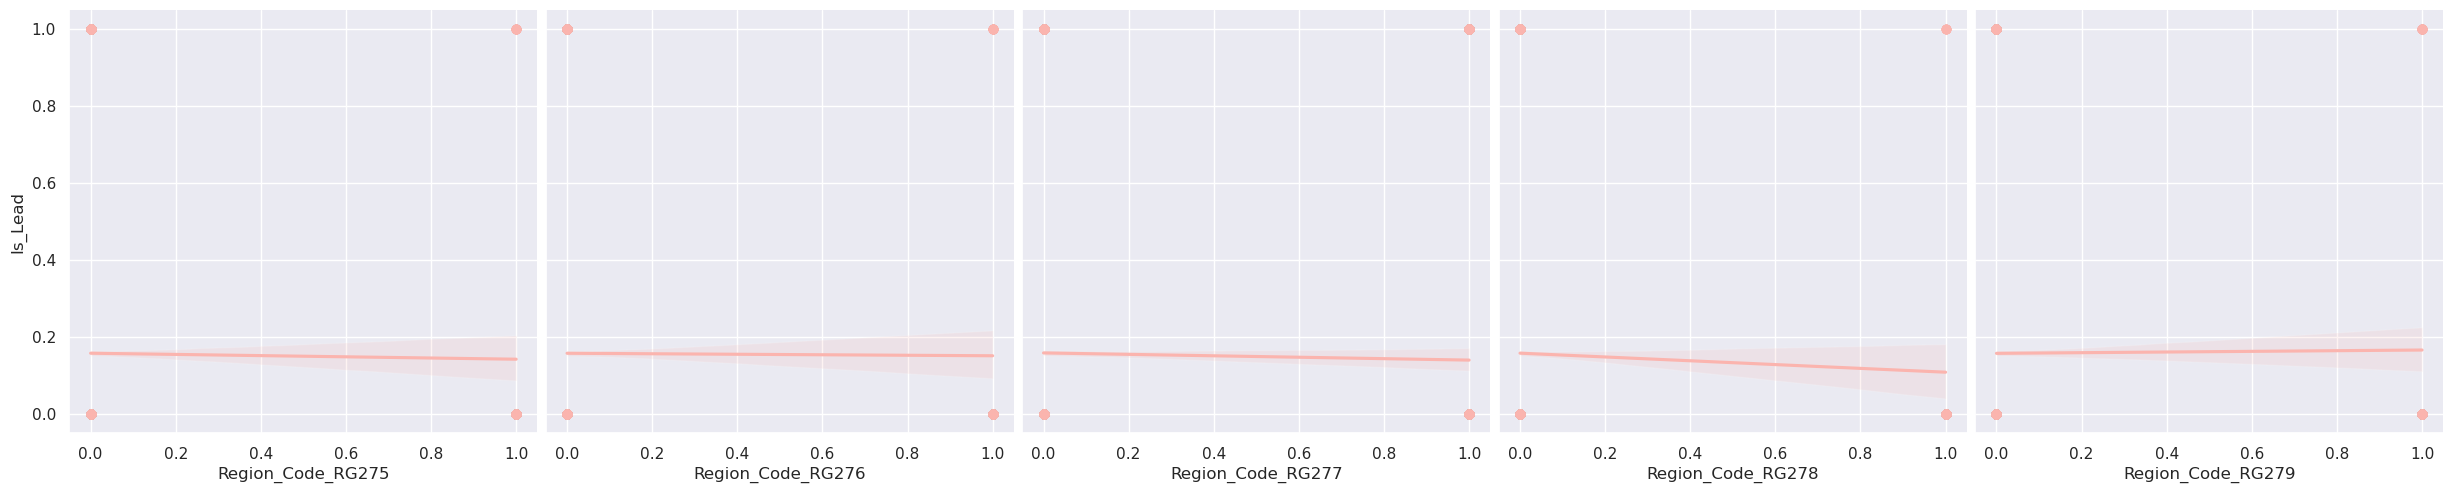

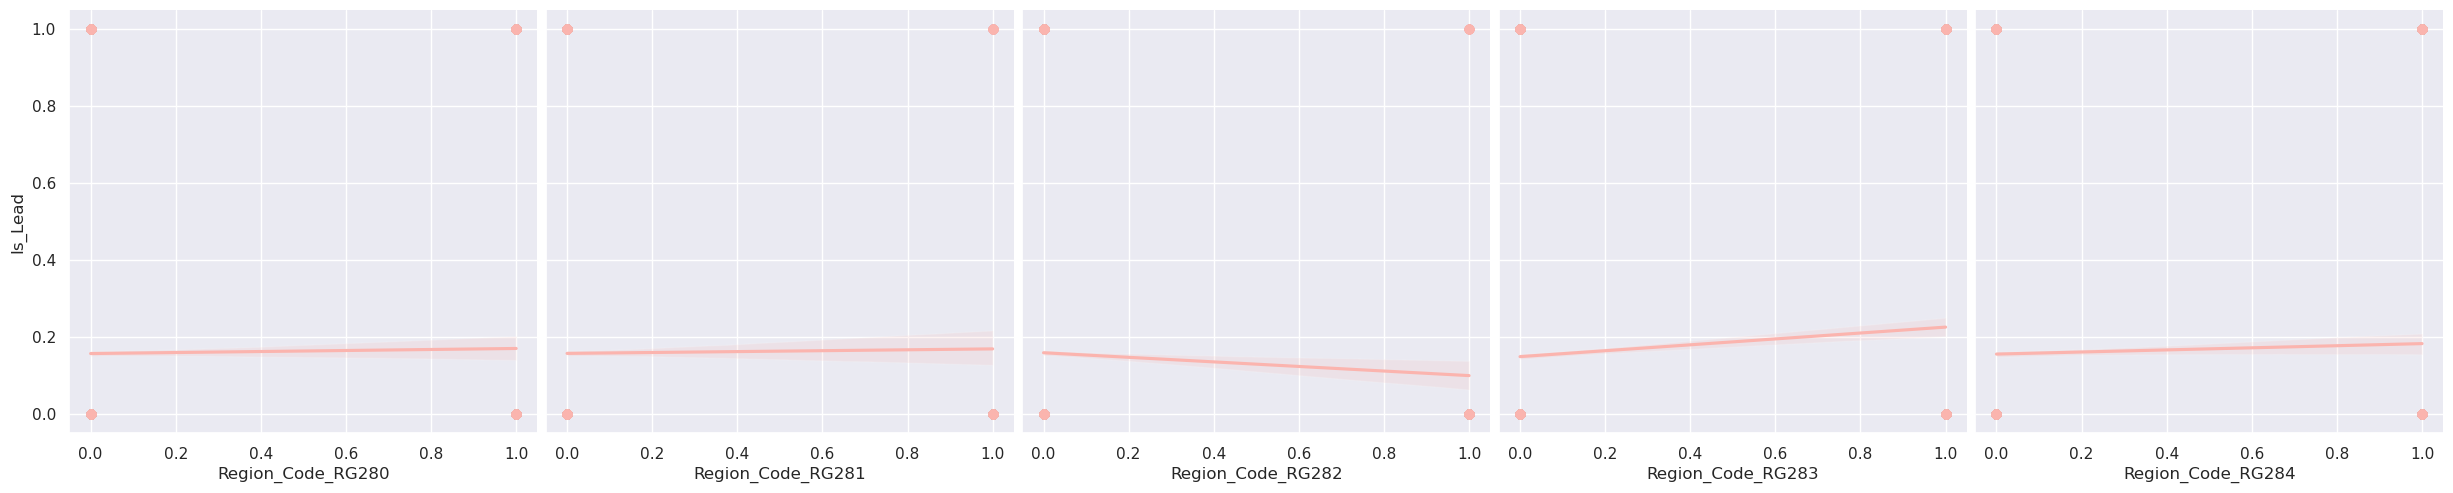

In [30]:
# Tratemos de ver correlaciones entre las variables de región y la salida
x_vars = list(data)
x_vars = [ x for x in x_vars if 'Region' in x] 

print(x_vars)
print(len(x_vars))

graphsPerRow = 5

assert len(x_vars) % graphsPerRow == 0,f'usa un múltiplo de {len(x_vars)} para el número de gráficas por fila'

for i in range(int(len(x_vars)/graphsPerRow)):
    sns.pairplot(data, x_vars=x_vars[i*graphsPerRow:i*graphsPerRow+graphsPerRow], y_vars='Is_Lead', height=5, aspect=1, kind='reg')
    plt.show()

# Observaciones:
# No notamos que alguna región destaque

In [75]:
# Veamos si hay otras correlaciones entre nuestras variables:
thres = .4
corrs = data.corr(method="spearman")
print(f'Spearman > {thres}:')
print(f'-------------------------')
moreCorr = []
for i, row in corrs.iterrows():
    for ic,val in zip(list(data),row):
        if val>thres and i!=ic:
            if val>=.4 and val<.69:
                note = 'Moderate'
            elif val>.7 and val<.89:
                note = 'Strong'
            elif val>=.9:
                note = 'Very Strong'
                
            variablesCorrelacionadas = [i,ic]
            variablesCorrelacionadas.sort()
            text = ' - '.join(variablesCorrelacionadas)
            moreCorr.append(f' {text} : {str(round(val,3))} ({note})')

moreCorr=list(set(moreCorr))
moreCorr.sort()
for i in moreCorr:
    print(i)

Spearman > 0.4:
-------------------------
 Age - Channel_Code_X3 : 0.477 (Moderate)
 Age - Vintage : 0.655 (Moderate)
 Channel_Code_X1 - Occupation_Salaried : 0.607 (Moderate)
 Channel_Code_X3 - Vintage : 0.487 (Moderate)


### Observaciones:
Se nota una correlación moderada entre Channel_Code_X3 y  Vintage (pudo ser que ese canal se enfocó en ciertos clientes con mucha o poca antiguedad).

También moderada de ese mismo canal y la edad de los clientes.

Y correlaciones un poco más fuertes entre el canal X1 y clientes asalariados.

Desde luego, la correlación que ya habiamos notado entre edad y vintage (historial crediticio).

In [78]:
### Selección de Features

# selector = SelectKBest(k=5)
selector = VarianceThreshold(0.25)
scaler = MinMaxScaler()

selector.fit(data)
#clf = DecisionTreeClassifier() 

#pl = Pipeline([('selector',selector),
#               ('escalador',scaler),
#               ('clasificador',clf)])

VarianceThreshold(threshold=0.25)

In [79]:
selector.

{'threshold': 0.25}

## Selección de clasificador

### Arboles de decicion: ver las variables
### clustering para ver los clientes parecidos